In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [2]:
file1 = ET.parse('LISDELAY_BeforeUpdate.xml').getroot()
file2 = ET.parse('LISDELAY_AfterUpdate.xml').getroot()

In [3]:
ProdDBId1, CLKDEL51, CLKDEL61 = [], [], []

for i in file1.findall('Entry'):
    if i.find('ScanResults/GBTData/CLKDEL5') != None:
        ProdDBId1.append(i.find('ProdDBId').text)
        CLKDEL51.append(int(i.find('ScanResults/GBTData/CLKDEL5').text, 16))
        CLKDEL61.append(int(i.find('ScanResults/GBTData/CLKDEL6').text, 16))

set1 = [ProdDBId1, CLKDEL51, CLKDEL61]

In [4]:
ProdDBId2, CLKDEL52, CLKDEL62 = [], [], []

for i in file2.findall('Entry'):
    if i.find('ScanResults/GBTData/CLKDEL5') != None:
        ProdDBId2.append(i.find('ProdDBId').text)
        CLKDEL52.append(int(i.find('ScanResults/GBTData/CLKDEL5').text, 16))
        CLKDEL62.append(int(i.find('ScanResults/GBTData/CLKDEL6').text, 16))

set2 = [ProdDBId2, CLKDEL52, CLKDEL62]

In [5]:
both = []
only1 = []
only2 = []

for i in range(len(set1[0])):
    for j in range(len(set2[0])):
        if set1[0][i] == set2[0][j]:
            both.append([i,j])

for i,n in enumerate(set1[0]):
    if n not in set2[0]:
        only1.append(i)

for i,n in enumerate(set2[0]):
    if n not in set1[0]:
        only2.append(i)

In [6]:
difference = []

for i,j in both:
    difference.append(set2[1][j] - set1[1][i])

print(sorted(list(set(difference))))

[-123, -63, -43, -42, -23, -22, -21, -3, -2, 17, 18, 19, 38, 39, 58, 59, 79, 99]


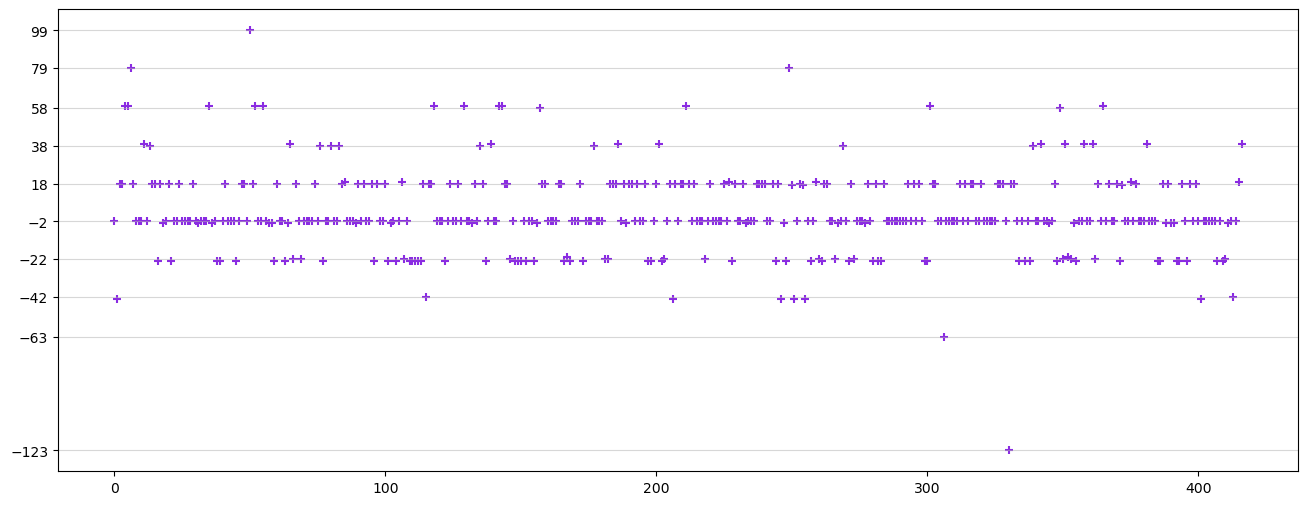

In [35]:
plt.figure(figsize=(16,6))
plt.scatter(range(len(difference)), difference, marker='+', color='blueviolet')
plt.yticks([-123, -63, -42, -22, -2, 18, 38, 58, 79, 99])
plt.grid(True, alpha=0.5, axis='y')
plt.show()